X shape: (1024, 2414)
C shape: (100, 100)


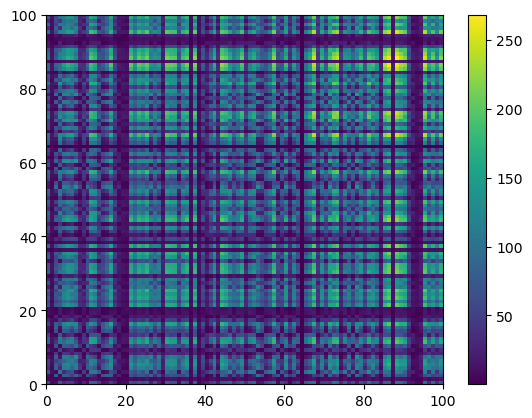

0.00039594146482122526
(array([64]), array([64]))


In [47]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Load the data
results = loadmat('yalefaces.mat')
X = results['X']
print("X shape:", X.shape)

# Compute the correlation matrix between the first 100 images in X
C = np.dot(X[:, :100].T, X[:, :100])
print("C shape:", C.shape)

# Plot the correlation matrix using pcolor
plt.pcolor(C)
plt.colorbar()
plt.show()

# Find the two most highly correlated and most uncorrelated images
max_corr = np.max(C - np.eye(100)*C)
min_corr = np.min(C)
print(min_corr)
most_corr = np.where(C == max_corr)
least_corr = np.where(C == min_corr)
print(least_corr)

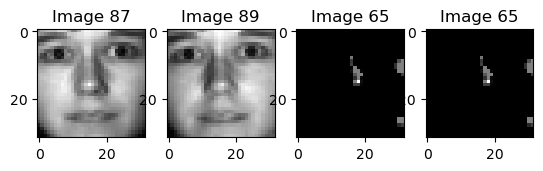

In [48]:
# max_corr = np.max(C - np.eye(100)*C)
# print(max_corr)
# min_corr = np.min(C)
# print(min_corr)
# most_corr = np.where(C == max_corr)
# print("Max correlation index", most_corr)
# least_corr = np.where(C == min_corr)
# print("Least correlation index", least_corr)

# Plot the two most highly correlated and most uncorrelated images
fig, axs = plt.subplots(1, 4)
axs[0].imshow(X[:, most_corr[0][0]].reshape(32, 32), cmap='gray')
axs[0].set_title('Image ' + str(most_corr[0][0] + 1))
axs[1].imshow(X[:, most_corr[1][0]].reshape(32, 32), cmap='gray')
axs[1].set_title('Image ' + str(most_corr[1][0] + 1))
axs[2].imshow(X[:, least_corr[0][0]].reshape(32, 32), cmap='gray')
axs[2].set_title('Image ' + str(least_corr[0][0] + 1))
axs[3].imshow(X[:, least_corr[1][0]].reshape(32, 32), cmap='gray')
axs[3].set_title('Image ' + str(least_corr[1][0] + 1))
plt.show()

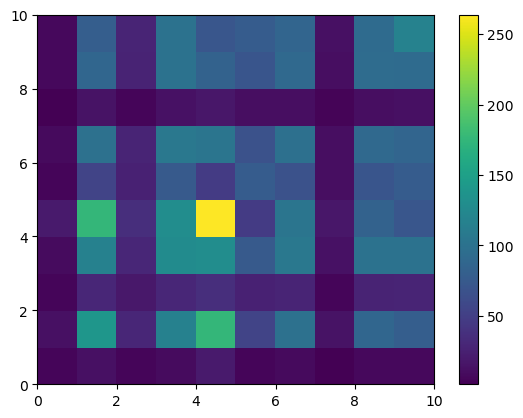

In [55]:
face_idx = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
faces_we_care = X[:, face_idx]

face_corr = np.dot(faces_we_care.T, faces_we_care)

plt.pcolor(face_corr)
plt.colorbar()
plt.show()

In [60]:
Y = np.dot(X, X.T)

eigval, eigvec = np.linalg.eig(Y)
print(eigvec[:6], max(eigval))

[[ 2.38432673e-02  4.53537771e-02  5.65319581e-02 ... -4.81826746e-03
  -1.34401900e-02  8.35866796e-05]
 [ 2.57614551e-02  4.56753589e-02  4.70912409e-02 ...  1.14015058e-02
   1.69691915e-02  6.51039524e-03]
 [ 2.72844843e-02  4.47452788e-02  3.62806957e-02 ... -2.83860658e-02
  -1.68175102e-02 -3.53766719e-03]
 [ 2.89902025e-02  4.31616271e-02  2.34472658e-02 ...  4.59096091e-02
   1.59323273e-02 -4.84596532e-04]
 [ 3.05729377e-02  4.08083809e-02  9.92662421e-03 ... -6.85472354e-02
  -1.15947493e-02  2.96729282e-03]
 [ 3.22932380e-02  3.80511619e-02 -2.41627436e-03 ...  3.71101815e-02
   2.04987473e-02 -4.95588709e-03]] 234020.4548538864


In [67]:
S, V, D = np.linalg.svd(X.T)
print(D[:6])


[[-0.02384327 -0.02576146 -0.02728448 ... -0.02082937 -0.0193902
  -0.0166019 ]
 [ 0.04535378  0.04567536  0.04474528 ... -0.03737158 -0.03557383
  -0.02965746]
 [ 0.05653196  0.04709124  0.0362807  ...  0.06455006  0.06196898
   0.05241684]
 [-0.04441826 -0.05057969 -0.05522219 ...  0.01006919  0.00355905
  -0.00040934]
 [ 0.03378603  0.01791442  0.00462854 ... -0.06172201 -0.05796353
  -0.05757412]
 [-0.02207542 -0.03378819 -0.04487476 ... -0.03025485 -0.02850199
  -0.00941028]]


In [69]:
norm = np.linalg.norm(np.abs(D[0])-np.abs(eigvec[0]))
print(norm)

0.7652145764217879


In [76]:
total_var = np.sum(np.square(V))
pct_var_explained = (np.square(V) / total_var) * 100
pct_var_explained = np.round(pct_var_explained, 2)
print('Percentage of variance explained by each principal component:', pct_var_explained)



Percentage of variance explained by each principal component: [72.93 15.28  2.57 ...  0.    0.    0.  ]
